# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

url = "http://api.openweathermap.org/data/2.5/weather?"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
        # Parse the JSON and retrieve data
    city_weather = requests.get(city_url+city).json()
  
    try:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wairoa
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | high prairie
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | north bend
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | campbellton
Processing Record 16 of Set 1 | coihaique
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | norman wells
Processing

Processing Record 34 of Set 4 | bakel
Processing Record 35 of Set 4 | pevek
Processing Record 36 of Set 4 | musoma
Processing Record 37 of Set 4 | tarudant
City not found. Skipping...
Processing Record 38 of Set 4 | olga
Processing Record 39 of Set 4 | gondanglegi
Processing Record 40 of Set 4 | margate
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | tomatlan
Processing Record 45 of Set 4 | kavaratti
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | eyl
Processing Record 48 of Set 4 | barentu
Processing Record 49 of Set 4 | takehara
Processing Record 0 of Set 5 | malwan
City not found. Skipping...
Processing Record 1 of Set 5 | severnyy
Processing Record 2 of Set 5 | balakhta
Processing Record 3 of Set 5 | lendava
Processing Record 4 of Set 5 | khatanga
Processing Record 5 of Set 5 | beyneu
Processing Record 6 of Set 5 | omboue
Processing Record 7 of Set 5 

Processing Record 24 of Set 8 | faanui
Processing Record 25 of Set 8 | kambove
Processing Record 26 of Set 8 | verkhnevilyuysk
Processing Record 27 of Set 8 | kailua
Processing Record 28 of Set 8 | khonuu
City not found. Skipping...
Processing Record 29 of Set 8 | senanga
Processing Record 30 of Set 8 | staro nagoricane
City not found. Skipping...
Processing Record 31 of Set 8 | manokwari
Processing Record 32 of Set 8 | half moon bay
Processing Record 33 of Set 8 | marienburg
Processing Record 34 of Set 8 | caohe
Processing Record 35 of Set 8 | bosobolo
Processing Record 36 of Set 8 | mwinilunga
Processing Record 37 of Set 8 | honningsvag
Processing Record 38 of Set 8 | voh
Processing Record 39 of Set 8 | kungurtug
Processing Record 40 of Set 8 | bahia blanca
Processing Record 41 of Set 8 | sao jose de piranhas
Processing Record 42 of Set 8 | outjo
Processing Record 43 of Set 8 | ambon
Processing Record 44 of Set 8 | waddan
Processing Record 45 of Set 8 | sorong
Processing Record 46 of

Processing Record 12 of Set 12 | badiraguato
Processing Record 13 of Set 12 | sal rei
Processing Record 14 of Set 12 | yarada
Processing Record 15 of Set 12 | madang
Processing Record 16 of Set 12 | husavik
Processing Record 17 of Set 12 | tagusao
Processing Record 18 of Set 12 | male
Processing Record 19 of Set 12 | sainte-suzanne
Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | igarka
Processing Record 22 of Set 12 | santa cruz
Processing Record 23 of Set 12 | virginia beach
Processing Record 24 of Set 12 | escarcega
Processing Record 25 of Set 12 | tonj
Processing Record 26 of Set 12 | grindavik
Processing Record 27 of Set 12 | kaniama
Processing Record 28 of Set 12 | emerald
Processing Record 29 of Set 12 | handan
Processing Record 30 of Set 12 | paradwip
City not found. Skipping...
Processing Record 31 of Set 12 | constitucion
Processing Record 32 of Set 12 | fairbanks
Processing Record 33 of Set 12 | rosetta
Processing Record 34 of Set 12 | paita
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wairoa,-39.0333,177.3667,291.23,99,100,3.13,NZ,1674088629
1,georgetown,5.4112,100.3354,298.12,87,20,2.06,MY,1674088507
2,butaritari,3.0707,172.7902,300.30,78,89,7.09,KI,1674088631
3,cabo san lucas,22.8909,-109.9124,295.32,64,20,4.63,MX,1674088631
4,bredasdorp,-34.5322,20.0403,293.15,84,6,2.61,ZA,1674088632


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wairoa,-39.0333,177.3667,291.23,99,100,3.13,NZ,1674088629
1,georgetown,5.4112,100.3354,298.12,87,20,2.06,MY,1674088507
2,butaritari,3.0707,172.7902,300.30,78,89,7.09,KI,1674088631
3,cabo san lucas,22.8909,-109.9124,295.32,64,20,4.63,MX,1674088631
4,bredasdorp,-34.5322,20.0403,293.15,84,6,2.61,ZA,1674088632


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

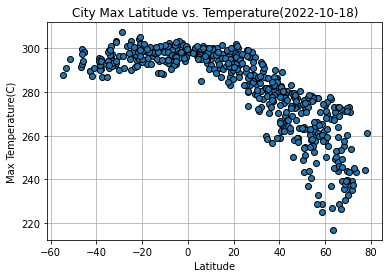

In [12]:
# Build scatter plot for latitude vs. temperature

plt.plot(city_data_df["Lat"],city_data_df["Max Temp"],"o", mec= 'k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs. Temperature(2022-10-18)')
plt.grid()


# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig1.png")



#### Latitude Vs. Humidity

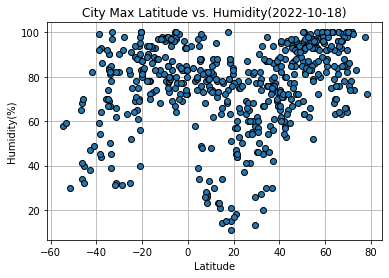

In [13]:
plt.plot(city_data_df["Lat"],city_data_df["Humidity"],"o", mec= 'k')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Max Latitude vs. Humidity(2022-10-18)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

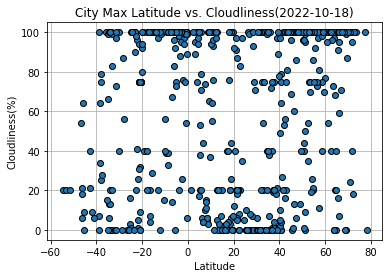

In [14]:
plt.plot(city_data_df["Lat"],city_data_df["Cloudiness"],"o", mec= 'k')
plt.xlabel('Latitude')
plt.ylabel('Cloudliness(%)')
plt.title('City Max Latitude vs. Cloudliness(2022-10-18)')
plt.grid()




# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

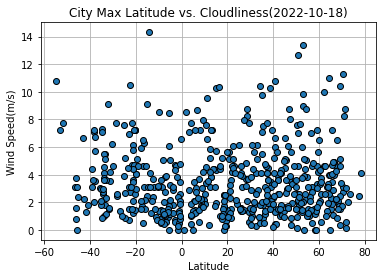

In [15]:
plt.plot(city_data_df["Lat"],city_data_df["Wind Speed"],"o", mec= 'k')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Max Latitude vs. Cloudliness(2022-10-18)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,georgetown,5.4112,100.3354,298.12,87,20,2.06,MY,1674088507
2,butaritari,3.0707,172.7902,300.30,78,89,7.09,KI,1674088631
3,cabo san lucas,22.8909,-109.9124,295.32,64,20,4.63,MX,1674088631
7,cherskiy,68.7500,161.3000,230.64,99,100,1.83,RU,1674088636
8,high prairie,55.4334,-116.4858,262.60,95,92,1.10,CA,1674088637


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wairoa,-39.0333,177.3667,291.23,99,100,3.13,NZ,1674088629
4,bredasdorp,-34.5322,20.0403,293.15,84,6,2.61,ZA,1674088632
5,airai,-8.9266,125.4092,293.29,77,100,1.41,TL,1674088378
6,hobart,-42.8794,147.3294,289.41,47,40,6.69,AU,1674088635
9,port alfred,-33.5906,26.8910,296.58,85,100,1.79,ZA,1674088638


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8411735002137372


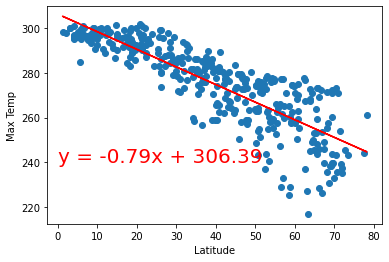

In [75]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(0,240),fontsize=20,color="red")
plt.show()



The r-value is: 0.35663619190968404


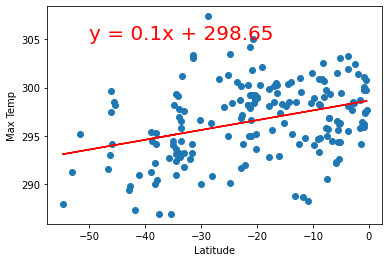

In [77]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-50,305),fontsize=20,color="red")
plt.show()


**Discussion about the linear relationship:** In Northern Hemisphere the r value is close to -1, which implies Temperature and Latitude are negatively related. As the Latitude gets higher Temperature gets lower.
In Southern Hemisphere, the r value is 0.35, which does not indicates weak positive relationship between the Latitude and Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4659153751660786


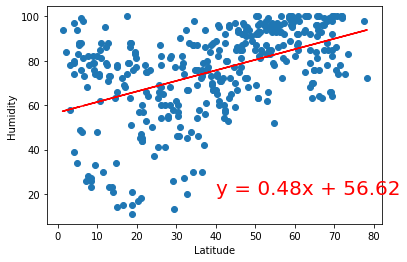

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(40,20),fontsize=20,color="red")
plt.show()

The r-value is: 0.47705456119373224


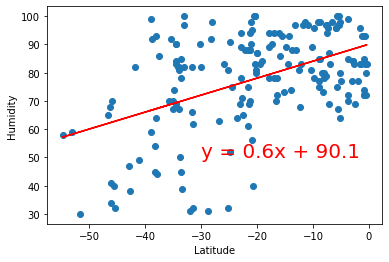

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-30,50),fontsize=20,color="red")
plt.show()

**Discussion about the linear relationship:** In Northern Hempisphere, the r value is 0.46, which implies the Latitude and Humidity have moderate positive relationship. 
In Southern Hemisphere, the r value is 0.47, which is also close to 0.5 which means latitude and humdity have moderate positive relationship. In, conclusion, it can be said Humdity increases with latitude increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.34008778258203537


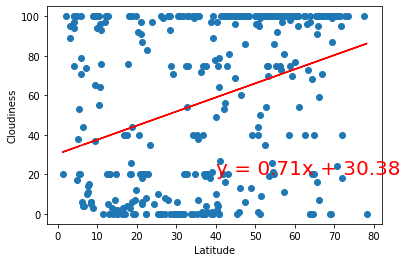

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(40,20),fontsize=20,color="red")
plt.show()

The r-value is: 0.43920979446403474


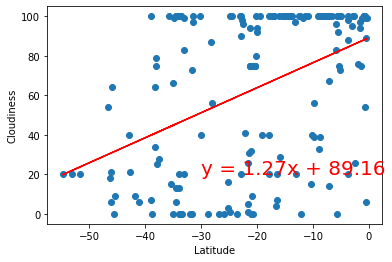

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-30,20),fontsize=20,color="red")
plt.show()

**Discussion about the linear relationship:** In Northern and Southern both Hemispheres, r value is between 0.3 to 0.5, which implies, Latitude and Cloudiness have weak positive relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.019331549996941245


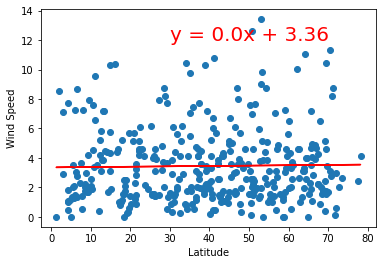

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(30,12),fontsize=20,color="red")
plt.show()

The r-value is: -0.25573524355189703


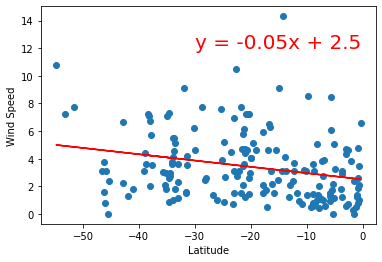

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-30,12),fontsize=20,color="red")
plt.show()

**Discussion about the linear relationship:** In Northern Hemisphere, r value is almost 0, which indicates there is no relationship between Latitude and Wind Speed. In Southern Hemipshere, r value is also less than 0.3, that implies, there is no relationship between Latitude and Wind Speed.